In [86]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import os
from textwrap import wrap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import eli5
import cleanfunc
import re
from sklearn.metrics import r2_score

importlib.reload(cleanfunc)


<module 'cleanfunc' from 'C:\\Users\\cartechr\\OneDrive - Mars Inc\\GitHub\\ABS-Region-Data\\cleanfunc.py'>

In [4]:
df = cleanfunc.load_merge_clean()

C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
df.head()


,,NUMBER OF BUSINESSES Number of non-employing businesses no.,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,BUSINESS ENTRIES Total number of business entries no.,...,RELIGIOUS AFFILIATION Hinduism %,RELIGIOUS AFFILIATION Islam %,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %
CODE,LABEL,,,,,,,,,,,,,,,,,,,,,
101021007,Braidwood,404.0,149.0,33.0,3.0,589.0,42.0,15.0,6.550351,3.855263,52.0,...,1.984069,3.172277,0.748598,0.5,35.3,14.6,85.0,3.2,11.7,3.4
101021008,Karabar,209.0,106.0,17.0,3.0,335.0,25.0,19.0,6.550351,3.855263,38.0,...,0.700000,0.700000,0.748598,0.8,24.5,8.1,89.7,4.0,6.2,13.5
101021009,Queanbeyan,402.0,193.0,89.0,27.0,712.0,75.0,32.0,5.000000,3.855263,111.0,...,3.100000,2.400000,0.100000,2.1,28.5,10.5,80.6,11.2,8.2,21.2
101021010,Queanbeyan - East,292.0,144.0,90.0,24.0,554.0,39.0,23.0,4.000000,3.855263,67.0,...,3.200000,3.900000,0.200000,2.6,27.4,9.2,82.0,11.4,6.4,20.4
101021011,Queanbeyan Region,915.0,487.0,119.0,9.0,1526.0,149.0,50.0,3.000000,3.855263,202.0,...,0.300000,0.200000,0.748598,0.6,32.5,12.2,87.8,2.6,9.7,5.8


In [12]:
latlng = pd.read_csv('latlng.csv')

df = pd.merge(df, latlng, how = 'left', left_on=['LABEL'], right_on = ['LABEL'])

In [32]:

df = df.set_index(['LABEL'])
df.head()

,NUMBER OF BUSINESSES Number of non-employing businesses no.,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,BUSINESS ENTRIES Total number of business entries no.,...,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %,lat,long
LABEL,,,,,,,,,,,,,,,,,,,,,
Braidwood,404.0,149.0,33.0,3.0,589.0,42.0,15.0,6.550351,3.855263,52.0,...,0.748598,0.5,35.3,14.6,85.0,3.2,11.7,3.4,-35.444450,149.799675
Karabar,209.0,106.0,17.0,3.0,335.0,25.0,19.0,6.550351,3.855263,38.0,...,0.748598,0.8,24.5,8.1,89.7,4.0,6.2,13.5,-35.375943,149.232872
Queanbeyan,402.0,193.0,89.0,27.0,712.0,75.0,32.0,5.000000,3.855263,111.0,...,0.100000,2.1,28.5,10.5,80.6,11.2,8.2,21.2,-35.352466,149.233725
Queanbeyan - East,292.0,144.0,90.0,24.0,554.0,39.0,23.0,4.000000,3.855263,67.0,...,0.200000,2.6,27.4,9.2,82.0,11.4,6.4,20.4,-35.345549,149.246507
Queanbeyan Region,915.0,487.0,119.0,9.0,1526.0,149.0,50.0,3.000000,3.855263,202.0,...,0.748598,0.6,32.5,12.2,87.8,2.6,9.7,5.8,-35.352466,149.233725


,LABEL,NUMBER OF BUSINESSES Number of non-employing businesses no.,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,...,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %,lat,long
0,Braidwood,404.0,149.000000,33.000000,3.000000,589.0,42.000000,15.000000,6.550351,3.855263,...,0.748598,0.500000,35.3,14.6,85.0,3.200000,11.7,3.40000,-35.444450,149.799675
1,Karabar,209.0,106.000000,17.000000,3.000000,335.0,25.000000,19.000000,6.550351,3.855263,...,0.748598,0.800000,24.5,8.1,89.7,4.000000,6.2,13.50000,-35.375943,149.232872
2,Queanbeyan,402.0,193.000000,89.000000,27.000000,712.0,75.000000,32.000000,5.000000,3.855263,...,0.100000,2.100000,28.5,10.5,80.6,11.200000,8.2,21.20000,-35.352466,149.233725
3,Queanbeyan - East,292.0,144.000000,90.000000,24.000000,554.0,39.000000,23.000000,4.000000,3.855263,...,0.200000,2.600000,27.4,9.2,82.0,11.400000,6.4,20.40000,-35.345549,149.246507
4,Queanbeyan Region,915.0,487.000000,119.000000,9.000000,1526.0,149.000000,50.000000,3.000000,3.855263,...,0.748598,0.600000,32.5,12.2,87.8,2.600000,9.7,5.80000,-35.352466,149.233725
5,Queanbeyan West - Jerrabomberra,511.0,257.000000,95.000000,17.000000,880.0,62.000000,40.000000,4.000000,3.855263,...,0.100000,0.700000,27.5,6.8,91.9,3.300000,4.7,10.70000,-35.383336,149.201305
6,Bombala,227.0,126.000000,40.000000,6.000000,397.0,20.000000,9.000000,6.550351,3.855263,...,0.748598,0.400000,21.7,8.7,90.2,2.500000,7.4,2.80000,-36.911317,149.238937
7,Cooma,356.0,236.000000,112.000000,17.000000,722.0,30.000000,18.000000,3.000000,3.000000,...,0.748598,0.400000,26.6,13.2,85.3,3.900000,10.8,6.70000,-36.235630,149.126422
8,Cooma Region,272.0,119.000000,49.000000,28.505576,441.0,20.000000,15.000000,6.550351,3.855263,...,0.100000,0.500000,26.3,12.6,88.1,2.900000,9.1,3.60000,-36.235630,149.126422
9,Jindabyne - Berridale,490.0,277.000000,121.000000,20.000000,912.0,55.000000,37.000000,4.000000,3.855263,...,0.100000,0.400000,38.8,12.2,85.9,5.600000,8.5,5.70000,-36.370880,148.821330


In [90]:

cycle_col = 'METHOD OF TRAVEL TO WORK - EMPLOYED PERSONS Used one method - Bicycle no.'
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']

In [91]:
y[y>1]

Series([], dtype: float64)

In [46]:
df = df[y<0.1]
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']
X = df.drop([cycle_col], axis = 1)

In [74]:
bins     = np.geomspace(min(y), max(y), 10)
y_binned = np.digitize(y, bins)



In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify = y_binned)

In [66]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

Text(0, 0.5, 'Actuals')

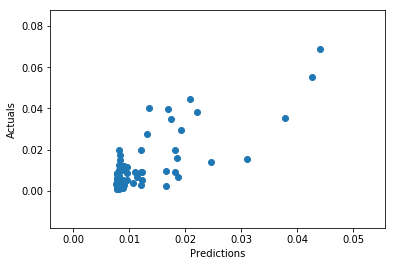

In [68]:
y_pred = ada.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [69]:
perm = eli5.sklearn.PermutationImportance(ada).fit(X_test, y_test)

In [70]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0525 ± 0.0445,FIELD OF STUDY Creative Arts %
0.0327 ± 0.0012,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %"
0.0164 ± 0.0186,SOCIAL MARITAL STATUS & REGISTERED MARITAL STATUS Married %
0.0139 ± 0.0136,SOCIAL MARITAL STATUS & REGISTERED MARITAL STATUS Never Married %
0.0108 ± 0.0114,HOUSEHOLDS BY TYPE Group households no.
0.0097 ± 0.0058,ESTIMATES OF PERSONAL INCOME Total income (excl. Government pensions and allowances) - Income share of top 1% of earners %
0.0078 ± 0.0058,"DWELLING STRUCTURE Semi-detached, row or terrace house, townhouse etc. no."
0.0077 ± 0.0043,FIELD OF STUDY Architecture and Building %
0.0060 ± 0.0009,ESTIMATES OF PERSONAL INCOME Total income (excl. Government pensions and allowances) - Income share of top 5% of earners %
0.0056 ± 0.0021,"ESTIMATED RESIDENT POPULATION (USUAL RESIDENTS, ERP AT 30 JUNE) 80-84 years no."


In [ ]:
r2_score(y_test, y_pred)


In [83]:
paramgrid = {'n_estimators': [50, 100, 1000],
             'learning_rate':[0.01,0.1,1]
            }

gb = GridSearchCV(AdaBoostRegressor(), param_grid = paramgrid)

In [84]:
#ada.get_params().keys()
gb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 1000], 'learning_rate': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0, 0.5, 'Actuals')

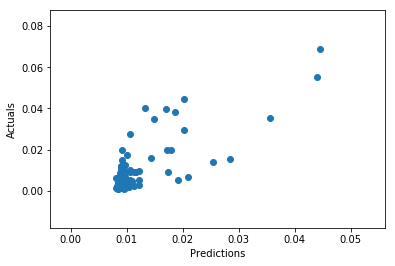

In [85]:
y_pred = gb.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [88]:
r2_score(y_test, y_pred)


0.5061602385929669

In [89]:
gb.best_params_

{'learning_rate': 1, 'n_estimators': 100}